# **Aufgabe 4 - Skalierung von Bilddaten**

In der Bildbearbeitung spielt das Interpolieren von Daten eine wichtige Rolle. Eine Anwendung ist das Skalieren von Bildern. Dabei werden mit Hilfe der bekannten Pixel Zwischenwerte berechnet, was zum Erhöhen oder Verringern der Auflösung verwendet werden kann. In dieser Aufgabe ist folgendes Bild von Homer aus den Simpsons in zwei Varianten gegeben: (1) Ein hoch aufgelöstes Bild mit 256x256 Pixeln Auflösung und (2) ein niedrig aufgelöstes Bild mit 128x128 Pixeln. Im folgenden ist das hoch aufgelöste Bild dargestellt:

![alt text](Daten/homer_256x256.jpg)

Das Ziel dieser Aufgabe ist es, mittels linearer Interpolation das 128x128 Bild auf eine Auflösung von 256x256 hochzuskalieren und mit dem Ausgangsbild zu vergleichen.

### **Teilaufgaben**

1. Lesen Sie das grob aufgelöste Bild `homer_128x128.jpg` im Ordner `Daten` ein und stellen Sie es dar.
2. Implementieren Sie einen Funktion, um die Auflösung quadratischer Bilder mittels linearer Interpolation zu verdoppeln.
3. Benutzen Sie die von Ihnen implementierte Funktion, um die Auflösung des gegebenen Bildes 128 x 128 Pixel auf 256 x 256 Pixel zu erhöhen. Stellen Sie beide Bilder dar.

### **Hinweise**

Zum Einlesen und Darstellen von Bildern kann in Python die Funktion [`Image()`](https://pillow.readthedocs.io/en/stable/reference/Image.html) aus dem Modul `PIL` verwendet werden. Anschließend kann das eingelesene Bild mittels der `Numpy`-Funktion [`asarray()`](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html) in ein zwei-dimensionales Numpy-Array umgewandelt werden. Abschließend wird das Bild mittels [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)-Funktion des Moduls `matplotlib` dargestellt. Dabei sind zwei zusätzliche Parameter sinnvoll:
 - Damit das anzuzeigende Bild bei der Darstellung nicht automatisch interpoliert wird, muss der Parameter `interpolation` auf `"none"` gesetzt werden.
 - Da es sich bei dem Bild um ein Schwarz-Weiß-Bild handelt, sollte die Farbdarstellung (engl. Color Map) auf grau gestellt werden, d.h. `cmap='grey'`.

Ein Minimalbeispiel sieht wie folgt aus:

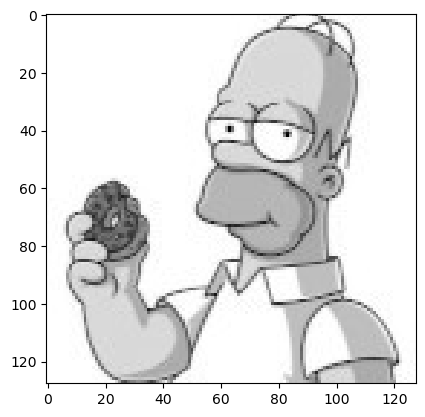

In [9]:
# Laden der erforderlichen Module
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Einlesen eines Bildes
bild_homer = Image.open("Daten/homer_128x128.jpg")

# Umwandeln des Bildes in ein Numpy-Array
bild_array = np.asarray(bild_homer)

# Darstellen des Bildes
plt.imshow(bild_array, interpolation="none", cmap='gray')
plt.show()

### **Lösung** - Aufgabe 4

### ***Algorithmische Lösung technischer Problem WS 2024/25***

### Studenten:

+ #### **Diego Espinosa**, MN: 61505, Studiengang: BENG
+ #### **Imad Sghir**, MN: 71767, Studiengang: BENG

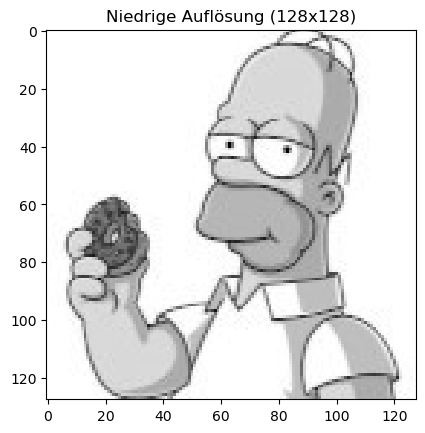

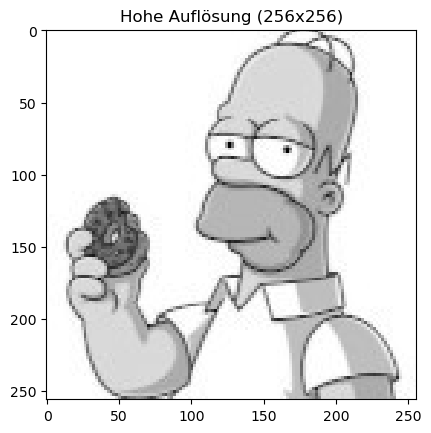

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Teil 1: Bild einlesen und darstellen
pfad_niedrige_aufloesung = "Daten/homer_128x128.jpg"
bild_niedrige_aufloesung = Image.open(pfad_niedrige_aufloesung)
bild_niedrige_aufloesung_array = np.asarray(bild_niedrige_aufloesung)

plt.imshow(bild_niedrige_aufloesung_array, interpolation="none", cmap="gray")
plt.title("Niedrige Auflösung (128x128)")
plt.show()

# Teil 2: Funktion zur Auflösungserhöhung (manuelle Interpolation)
def aufloesung_verdoppeln(bild_array):
    height, width = bild_array.shape
    neu_bild_array = np.zeros((height * 2, width * 2))

    for i in range(height):
        for j in range(width):
            original_pixel = bild_array[i, j]
            neu_bild_array[i * 2, j * 2] = original_pixel  # Originalpixel
             
            neu_bild_array[i * 2, j * 2 + 1] = original_pixel  # Pixel kopieren, Horizontale Interpolation
             
            neu_bild_array[i * 2 + 1, j * 2] = original_pixel  # Pixel kopieren, Vertikale Interpolation
            
            neu_bild_array[i * 2 + 1, j * 2 + 1] = original_pixel  # Pixel kopieren, Diagonale Interpolation

    return neu_bild_array

# Teil 3: Auflösung erhöhen und Bild darstellen
bild_hohe_aufloesung_array = aufloesung_verdoppeln(bild_niedrige_aufloesung_array)
plt.imshow(bild_hohe_aufloesung_array, interpolation="none", cmap="gray")
plt.title("Hohe Auflösung (256x256)")
plt.show()


### Ausführliche Erläuterung des Codes

### **Teil 0:**

#### 1. Importieren der notwendigen Bibliotheken

```python
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

+ ```matplotlib.pyplot``` wird verwendet, um die Bilder anzuzeigen.
+ ```numpy``` wird benötigt, um die Bilddaten in einem Array zu speichern und damit numerische Berechnungen durchzuführen.
+ ```PIL``` (Python Imaging Library) enthält die ```Image```-Klasse, um das Bild aus einer Datei einzulesen.

### **Teil 1:** Bild einlesen und darstellen

#### 2. Lesen des Bildes mit niedriger Auflösung (128x128)

```python
pfad_niedrige_aufloesung = "Daten/homer_128x128.jpg"
bild_niedrige_aufloesung = Image.open(pfad_niedrige_aufloesung)
bild_niedrige_aufloesung_array = np.asarray(bild_niedrige_aufloesung)
```

+  ```pfad_niedrige_aufloesung``` ist ein String, der den Pfad zur Bilddatei mit niedriger Auflösung angibt.
+ ```Image.open()``` öffnet das Bild unter dem angegebenen Pfad und lädt es in die Variable ```bild_niedrige_aufloesung```.
+ ```np.asarray()``` wandelt das Bild in ein ```numpy```-Array um, das als zweidimensionale Matrix aus Bildpixeln gespeichert wird. Dies erleichtert die spätere Bearbeitung und Skalierung des Bildes.

#### 3. Anzeigen des Bildes mit niedriger Auflösung

```python
plt.imshow(bild_niedrige_aufloesung_array, interpolation="none", cmap="gray")
plt.title("Bild mit niedriger Auflösung (128x128)")
plt.show()
```

+ ```plt.imshow()``` zeigt das Bild auf der Basis des Arrays ```bild_niedrige_aufloesung_array``` an.
+ ```interpolation="none"``` stellt sicher, dass das Bild ohne zusätzliche Interpolation angezeigt wird, d.h., die Pixel bleiben unverändert.
+ ```cmap="gray"``` stellt das Bild in Graustufen dar, was passend für ein Schwarz-Weiß-Bild ist.
+ ```plt.title()``` fügt einen Titel hinzu, der das Bild als "Bild mit niedriger Auflösung (128x128)" beschreibt.
+ ```plt.show()``` zeigt das Bildfenster an, sodass das Bild sichtbar wird.

### **Teil 2:** Funktion zur Auflösungserhöhung (manuelle Interpolation)

#### 4. Definieren der Funktion zur Verdopplung der Auflösung (manuelle Interpolation)

```python
def aufloesung_verdoppeln(bild_array):
    height, width = bild_array.shape
    neu_bild_array = np.zeros((height * 2, width * 2))
```

+ ```def aufloesung_verdoppeln(bild_array)```: definiert eine Funktion namens ```aufloesung_verdoppeln```, die ein Array ```bild_array``` als Eingabe nimmt und die Auflösung durch manuelle Interpolation verdoppelt.
+ ```height, width = bild_array.shape```: Holt die Höhe und Breite des Originalbildes.
+ ```np.zeros()```: Erstellt ein neues Array ```neu_bild_array``` mit der doppelten Höhe und Breite, gefüllt mit Nullen.

#### 5. Pixelwerte in das neue Array übertragen:

```python
for i in range(height):
    for j in range(width):
        original_pixel = bild_array[i, j]
```

+ Zwei ```for```-Schleifen: Iterieren über jede Zeile (```i```) und Spalte (```j```) des Originalbildes.
+ ```original_pixel = bild_array[i, j]```: Speichert den Pixelwert des Originalbildes an der Position ```(i, j)```.

#### 6. Interpolationspunkte im neuen Array füllen:

```python
        neu_bild_array[i * 2, j * 2] = original_pixel  # Originalpixel
```        

+ Setzt den Originalpixelwert an die Position ```(i * 2, j * 2)``` im neuen Array. Dies entspricht der ursprünglichen Position im vergrößerten Bild.


```python
        neu_bild_array[i * 2, j * 2 + 1] = original_pixel  # Pixel kopieren, Horizontale Interpolation
```        

+ Füllt den horizontalen Nachbarpixel mit dem gleichen Wert, um die Lücke zu schließen.
        

```python
        neu_bild_array[i * 2 + 1, j * 2] = original_pixel  # Pixel kopieren, Vertikale Interpolation
```  

+ Füllt den vertikalen Nachbarpixel ebenfalls mit dem gleichen Wert.


```python
        neu_bild_array[i * 2 + 1, j * 2 + 1] = original_pixel  # Pixel kopieren, Diagonale Interpolation
``` 

+ Füllt den diagonalen Nachbarpixel mit dem gleichen Wert.

#### 7. Rückgabe des neues Arrays:

```python
return neu_bild_array
```

### **Teil 3:** Bild mit erhöhter Auflösung anzeigen

#### 8. Anwenden der Funktion und Speichern des Bildes mit hoher Auflösung

```python
bild_hohe_aufloesung_array = aufloesung_verdoppeln(bild_niedrige_aufloesung_array)
```

+ ```aufloesung_verdoppeln(bild_niedrige_aufloesung_array)``` wendet die Funktion auf das Array ```bild_niedrige_aufloesung_array``` an, um ein neues Array ```bild_hohe_aufloesung_array``` mit der doppelten Auflösung (256x256) zu erzeugen.


#### 9. Anzeigen des Bildes mit hoher Auflösung

```python
plt.imshow(bild_hohe_aufloesung_array, interpolation="none", cmap="gray")
plt.title("Interpoliertes Bild mit hoher Auflösung (256x256)")
plt.show()
```

+ ```plt.imshow()``` zeigt das interpolierte Bild ```bild_hohe_aufloesung_array``` an.
+ ```interpolation="none"``` stellt sicher, dass das Bild unverändert dargestellt wird.
+ ```cmap="gray"``` zeigt das Bild in Graustufen an.
+ ```plt.title()``` fügt einen Titel hinzu, der das Bild als "Interpoliertes Bild mit hoher Auflösung (256x256)" beschreibt.
+ ```plt.show()``` öffnet das Bildfenster und zeigt das interpolierte Bild an.